## Practical Work 4
somaya Hamdy Mohammad

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [6]:
x=np.linspace(0,20)

In [7]:
a= -2
b= 1

y=a*x+b

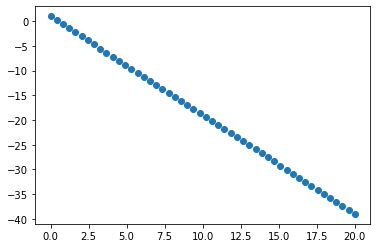

In [8]:
plt.scatter(x,y);

#### Plot your data points. 

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

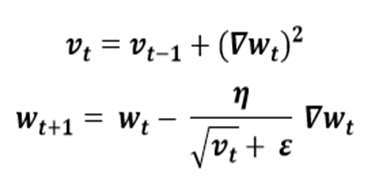

In [10]:
def J(x,y,theta_0,theta_1):
    m=len(x)
    cost = (1/(2*m) *((theta_0 + (theta_1 *x )) - y)**2).sum()
    return cost

In [11]:
J(x,y, 0,0)

249.88775510204084

In [19]:
def Adagrad(x, y, alpha , eps ,iterations):
    
    cost_list = []
    
    theta_0_list = []
    theta_1_list = []
    
    grad_0_list = []
    grad_1_list = []
    
    hypothesis_list=[]
    
    #theta intilization
    theta_0 = 0
    theta_1 = 0
    
    prev_v_theta_0 = 0
    prev_v_theta_1 = 0
    
    m = len(y)
    for i in range (iterations):
        
        #hypothesis
        h = theta_0 + (theta_1 * x)
        hypothesis_list.append(h)
        
        #get cost
        cost = J(x, y, theta_0 , theta_1)
        cost_list.append(cost)
        
        # caluulate gradiant
        grad_0 = (( h - y ).sum())/m
        grad_1= ((( h - y )* x) .sum())/m
        
        grad_0_list.append(theta_0)
        grad_1_list.append(theta_1)
        
        v_theta_0 =  prev_v_theta_0 + grad_0 * grad_0
        v_theta_1 =  prev_v_theta_1 + grad_1 * grad_1
        
        prev_v_theta_0 = v_theta_0
        prev_v_theta_1 = v_theta_1
        
        #update thetas
        theta_0 = theta_0 - (alpha/(np.sqrt(prev_v_theta_0) + eps))*grad_0
        theta_1 = theta_1 - (alpha/(np.sqrt(prev_v_theta_1) + eps))*grad_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        
        #if ther's no change in the cost so break
        if i > 1:
            if abs(cost_list[i-1]- cost_list[i])<0.0001:
                break

            #if ther's no change in gradiant so, break
            if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.0001:
                break

            #if no chane in thetas so break
            if abs(np.linalg.norm([grad_0_list[i],grad_1_list[i]])-np.linalg.norm([grad_0_list[i-1],grad_1_list[i-1]])) < 0.0001:
                break
    
    return theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list

In [20]:
# alpha = 0.01
# eps = 0.00000001
# iterations = 1000

In [29]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list = Adagrad(x, y,  0.1, 0.000001 ,1000)

In [30]:
y_pred =theta_0+ theta_1*x

In [31]:
y_pred

array([ -1.59633571,  -2.31805014,  -3.03976458,  -3.76147902,
        -4.48319346,  -5.20490789,  -5.92662233,  -6.64833677,
        -7.3700512 ,  -8.09176564,  -8.81348008,  -9.53519452,
       -10.25690895, -10.97862339, -11.70033783, -12.42205226,
       -13.1437667 , -13.86548114, -14.58719557, -15.30891001,
       -16.03062445, -16.75233889, -17.47405332, -18.19576776,
       -18.9174822 , -19.63919663, -20.36091107, -21.08262551,
       -21.80433994, -22.52605438, -23.24776882, -23.96948326,
       -24.69119769, -25.41291213, -26.13462657, -26.856341  ,
       -27.57805544, -28.29976988, -29.02148432, -29.74319875,
       -30.46491319, -31.18662763, -31.90834206, -32.6300565 ,
       -33.35177094, -34.07348537, -34.79519981, -35.51691425,
       -36.23862869, -36.96034312])

In [32]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.9860089728698159

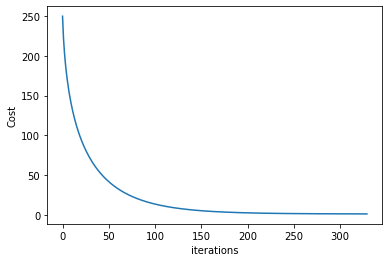

In [33]:
plt.plot(cost_list)
plt.xlabel('iterations')
plt.ylabel('Cost');

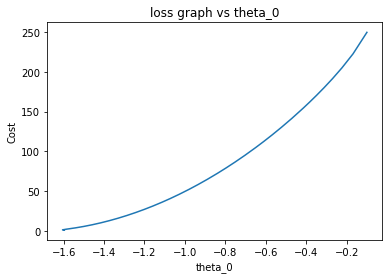

In [34]:
plt.plot(theta_0_list, cost_list)
plt.title('loss graph vs theta_0')
plt.xlabel('theta_0')
plt.ylabel('Cost');

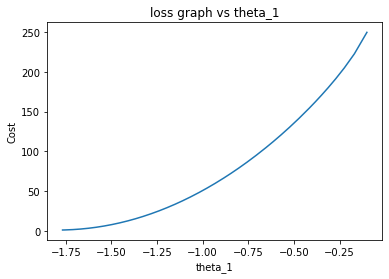

In [35]:
plt.plot(theta_1_list, cost_list)
plt.title('loss graph vs theta_1')
plt.xlabel('theta_1')
plt.ylabel('Cost');

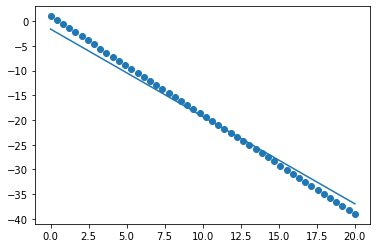

In [36]:
plt.scatter(x,y)
plt.plot(x,y_pred);

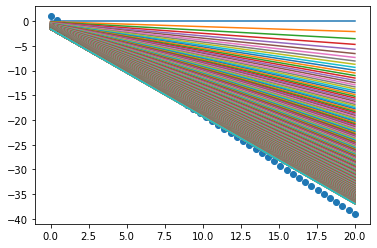

In [37]:
plt.scatter(x,y)
for i in np.array(hypothesis_list):
    plt.plot(x,i)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

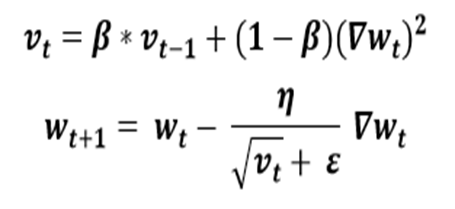

In [40]:
def RMSProp(x, y,beta, alpha , eps ,iterations):
    
    cost_list = []
    
    theta_0_list = []
    theta_1_list = []
    
    grad_0_list = []
    grad_1_list = []
    
    hypothesis_list=[]
    
    #theta intilization
    theta_0 = 0
    theta_1 = 0
    
    prev_v_theta_0 = 0
    prev_v_theta_1 = 0
    
    m = len(y)
    for i in range (iterations):
        
        #hypothesis
        h = theta_0 + (theta_1 * x)
        hypothesis_list.append(h)
        
        #get cost
        cost = J(x, y, theta_0 , theta_1)
        cost_list.append(cost)
        
        # caluulate gradiant
        grad_0 = (( h - y ).sum())/m
        grad_1= ((( h - y )* x) .sum())/m
        
        grad_0_list.append(theta_0)
        grad_1_list.append(theta_1)
        
        v_theta_0 =  beta * prev_v_theta_0 + (1 - beta)*(grad_0 * grad_0)
        v_theta_1 =  beta * prev_v_theta_1 + (1 - beta)*(grad_1 * grad_1)
        
        prev_v_theta_0 = v_theta_0
        prev_v_theta_1 = v_theta_1
        
        #update thetas
        theta_0 = theta_0 - (alpha/(np.sqrt(prev_v_theta_0) + eps))*grad_0
        theta_1 = theta_1 - (alpha/(np.sqrt(prev_v_theta_1) + eps))*grad_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        
        #if ther's no change in the cost so break
        if i > 1:
            if abs(cost_list[i-1]- cost_list[i])<0.0001:
                break

            #if ther's no change in gradiant so, break
            if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.0001:
                break

            #if no chane in thetas so break
            if abs(np.linalg.norm([grad_0_list[i],grad_1_list[i]])-np.linalg.norm([grad_0_list[i-1],grad_1_list[i-1]])) < 0.0001:
                break
    
    return theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list

In [59]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list = RMSProp(x, y,0.99,0.1, 0.000001 ,10)

In [60]:
y_pred =theta_0+ theta_1*x

In [61]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.9879942625193117

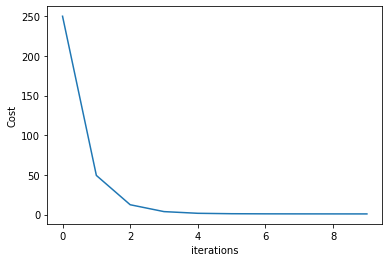

In [62]:
plt.plot(cost_list)
plt.xlabel('iterations')
plt.ylabel('Cost');

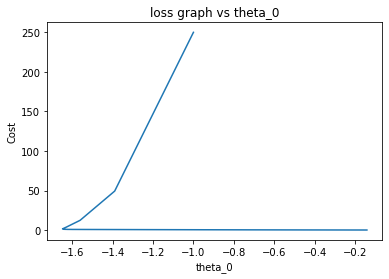

In [47]:
plt.plot(theta_0_list, cost_list)
plt.title('loss graph vs theta_0')
plt.xlabel('theta_0')
plt.ylabel('Cost');

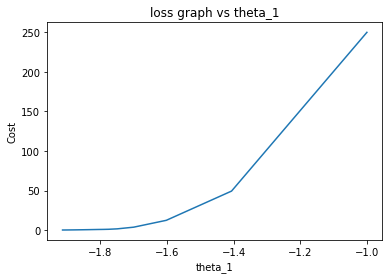

In [48]:
plt.plot(theta_1_list, cost_list)
plt.title('loss graph vs theta_1')
plt.xlabel('theta_1')
plt.ylabel('Cost');

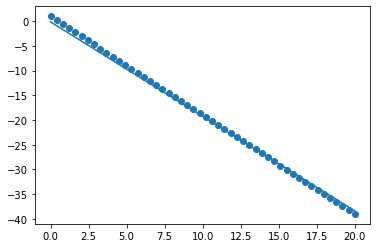

In [49]:
plt.scatter(x,y)
plt.plot(x,y_pred);

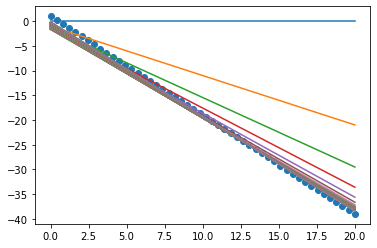

In [50]:
plt.scatter(x,y)
for i in np.array(hypothesis_list):
    plt.plot(x,i)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

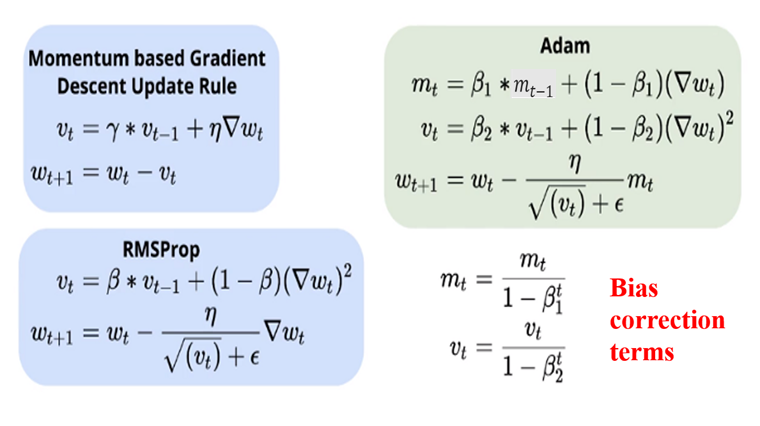

In [111]:
def Adam(x, y, beta1, beta2, alpha, eps ,iterations):
    
    cost_list = []
    
    theta_0_list = []
    theta_1_list = []
    
    grad_0_list = []
    grad_1_list = []
    
    hypothesis_list=[]
    
    #theta intilization
    theta_0 = 0
    theta_1 = 0
    
    
    prev_m_theta_0 = 0
    prev_m_theta_1 = 0
    
    prev_v_theta_0 = 0
    prev_v_theta_1 = 0
    
    m = len(y)
    for i in range (iterations):
        
        #hypothesis
        h = theta_0 + (theta_1 * x)
        hypothesis_list.append(h)
        
        #get cost
        cost = J(x, y, theta_0 , theta_1)
        cost_list.append(cost)
        
        # caluulate gradiant
        grad_0 = (( h - y ).sum())/m
        grad_1= ((( h - y )* x) .sum())/m
        
        grad_0_list.append(theta_0)
        grad_1_list.append(theta_1)
        
        
        m_theta_0 =  beta1 * prev_m_theta_0 + (1 - beta1)*(grad_0)
        m_theta_1 =  beta1 * prev_m_theta_1 + (1 - beta1)*(grad_1)
        
        prev_m_theta_0 = m_theta_0
        prev_m_theta_1 = m_theta_1
        
        v_theta_0 =  beta2 * prev_v_theta_0 + (1 - beta2)*(grad_0 * grad_0)
        v_theta_1 =  beta2 * prev_v_theta_1 + (1 - beta2)*(grad_1 * grad_1)
        
        prev_v_theta_0 = v_theta_0
        prev_v_theta_1 = v_theta_1
        
        mt_updat_0 = prev_m_theta_0/(1-beta1)
        mt_updat_1 = prev_m_theta_1/(1-beta1)
        
        vt_updat_0 = prev_v_theta_0/(1-beta2)
        vt_updat_1 = prev_v_theta_1/(1-beta2)
    
        
        #update thetas
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_updat_0) + eps))*mt_updat_0
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_updat_1) + eps))*mt_updat_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        
        #if ther's no change in the cost so break
        if i > 1:
            if abs(cost_list[i-1]- cost_list[i])<0.0001:
                break

            #if ther's no change in gradiant so, break
            if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.0001:
                break

            #if no chane in thetas so break
            if abs(np.linalg.norm([grad_0_list[i],grad_1_list[i]])-np.linalg.norm([grad_0_list[i-1],grad_1_list[i-1]])) < 0.0001:
                break
    
    return theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list

In [112]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list = Adam(x, y,0.7,0.6,0.01, 0.0000001 ,1000)

In [113]:
y_pred =theta_0+ theta_1*x

In [114]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.9999738271312891

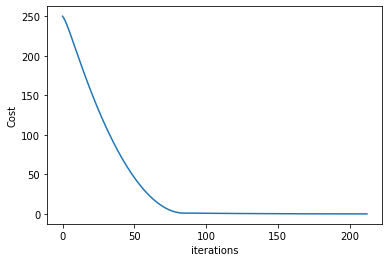

In [115]:
plt.plot(cost_list)
plt.xlabel('iterations')
plt.ylabel('Cost');

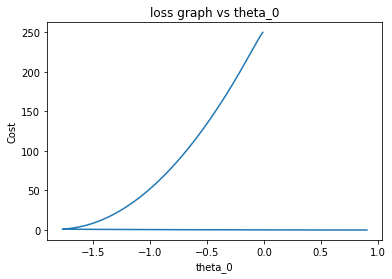

In [116]:
plt.plot(theta_0_list, cost_list)
plt.title('loss graph vs theta_0')
plt.xlabel('theta_0')
plt.ylabel('Cost');

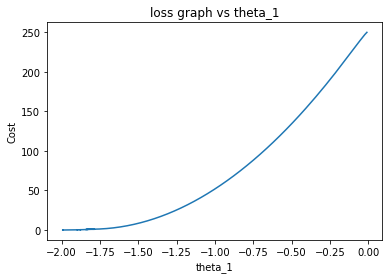

In [117]:
plt.plot(theta_1_list, cost_list)
plt.title('loss graph vs theta_1')
plt.xlabel('theta_1')
plt.ylabel('Cost');

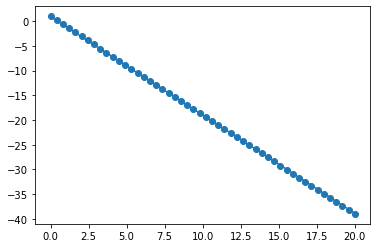

In [118]:
plt.scatter(x,y)
plt.plot(x,y_pred);

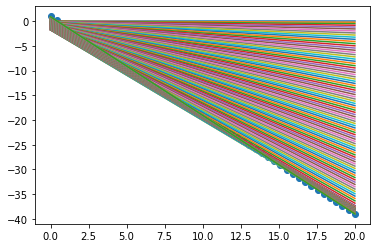

In [119]:
plt.scatter(x,y)
for i in np.array(hypothesis_list):
    plt.plot(x,i)

## Congratulations 
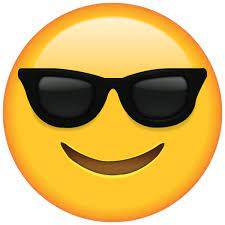